# Phenotype Prediction with Petrinets
## Introduction 
### Petri Nets
Petri nets are a mathematical model used to describe distributed systems. They consist of two elements: places (represented by a circle) and transitions (represented by rectangles) that are connected by arcs. In normal petri nets, a token is placed in one of the starting places, and follows down the arcs through other places and transitions at discrete time steps. Stochstic petri nets behave the same as above, but this time have a random firing rate. The firing rate can be related a function related to the current state of the petri net. Because the firing rate depends only on the current state, stochastic petri nets behave exactly like Markov chains. The transition states can behave like Boolean logic gates if you designate that tokens need to be in places adjectent to the transition state. First, we will go over two examples in the Setha book which have you create and simulate two petri nets to learn how they are used and created.

### Gillespie Algorithm
Before continuing on to the problem's in Sethna's book, we should also dicuss the Gillespie Algorithm (Gillespie, 1977). This is a computional way of finding a possible solution to a stochastic system whose reaction rates are known. In large chemical reaction systems, dealing with moles of molecules, this algorithm doesn't have much use, but in biological systems dealing with nanomoles, or even single molecules where it's computationally possible to estimate the positions of these molecuels, this model is particularly good at simulating the equilibrium concentrations of the molecules involved, as well as the large fluctations in concentration that are associated with systems who have a small number of reactants. The algorithm can be applied as a  Monte Carlo method. Gillespie algorithms and petri nets when combined are a powerful tool to model individual cell biochemistry, and are used extensivley in systems biology.<br>
The Model first starts with what is called the fundamental premise of stochastic chemical kinetics:
$$\rho(\tau,j|x,t) = a_{j}(x)e^{-\tau\sum_{j}a_{j}(x)}$$
$a$ is the probability function of a particular reaction occuring, $x$ is the vector of species and the number of each species, $\tau$ is the computed time unitil the next reaction and $t$ is the current time. Per Gillespie, the system can be verbally expressed as "the probability of $X(t) = x$ over an infinitesimal time interval and given the stoichemetry of the $j$th reaction." The time until the next reaction $\tau$ is an exponentionally distributed variable where:
$$\tau = \frac{1}{\sum_{j}a_{j}(x)}\ln(\frac{1}{r_{1}})$$. 
$j$ is an independent variable with point probablities: 
$$\frac{a_{j}(x)}{\sum_{j}a_{j}(x)}$$
To generate a Monte Carlo method, generate two pseudorandom numbers from $[0,1]$, $r_{1}$ and $r_{2}$ and compute $\tau$ and:
$$j = smallest\ integer\ satisfying \sum^{j}_{j'=1}a_{j'}(x)>r_{2}\sum_{j}a_{j}(x)$$
To perform the Monte Carlo method:
1. Initialize system as $t= t_{0}$ and $x = x_0$
2. With the system in state $x$ at time $t$, evaluate $a_{j}(x)$ and $\sum_{j}a_{j}(x)$
3. Effect the next reaction by replacing $t\leftarrow t+\tau$ and $x\leftarrow x+ v_{j}$
4. Record $(x,t)$ and repeat for desired amout of time

<br>
This explanation of the Gillespie algorithm is abstract and hard to understand, so at the start of the next problem, we will go through how to apply it to the specific problem presented prior to simulating the reaction.
<br><br>
The following are two exericises from Dr. James Sethna's textbook for statistical mechanics (https://sethna.lassp.cornell.edu/statistical_mechanics_entropy_order_parameters_and_complexity). We will work through these first to gain a basic understanding of how petri nets and stochastic recations work before we adapt it and apply a more complex genetic regulatory network.

## Stochastic Cells (Problem 8.10)
This problem uses a Petri Net to simulate the dimerization of two proteins to form a homodimer. 
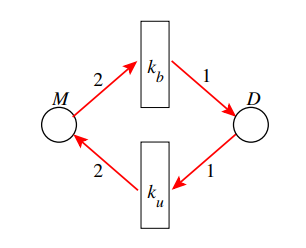

$k_{b}$ is the rate of dimerization and $k_{u}$ is the rate of disassociation. M is the monomer and D is the dimer. The numbers above each arc represent the stoicheometry of the reaction.
<br><br>
As promised, to apply the Gillespie algorithm, we first must find the total reaction rate $\Gamma$ utilizing the number of molecules present and the rate constants for the foward and reverse reactions. To apply the algorithm:
1. We advance the time forward in two steps: first to find the time until the next reaction and then which reaction is taking place, either the forward or reverse reaction. 
    * Reactions are assumed to be completely random, so the time until the next reaction $\delta t$ is randomly drawn from an exponentional distribution function with mean $\frac{1}{\Gamma}$ 
    * To find which reaction is occuring, it's simply the probability of the reaction taking place out of all possible reactions, for example the foward reaction: $\rho(AB\rightarrow A+B) = \frac{k_{u}[D]}{\Gamma}$
        * The probabliity of the other reaction is $1-\rho(AB\rightarrow A+B)$
2. Record the new concentrations of molecules and time 
3. Repeat. 
This algorithm should produce an average equilibrium concnetration of each molecule, however due to the small number of moleucles, it will produce a large fluctuations in concentration referred to as noise. 

<br>
For this problem, $k_{b} = 1nM^{-1}s^{-1}$ and $k_{u} = 2\ s^{-1}$, and that all $N$ monomers start in their unbound state at time $t = 0.$ 

### Part A: Continuum Dimerization 
#### Write a differential equation for $\frac{dM}{dt}$ treating $M$ and $D$ as continuous variables. Remember that two molecules $M$ are consumed in each reaction.
The dimerization reaction:
$$2M \longleftrightarrow D$$ with rates $k_{b} = 1nM^{-1}s^{-1}$ and $k_{u} = 2\ s^{-1}$ has two monomers "leaving" to form one dimer, and one dimer forms two monomers: 
$$\frac{d[M]}{dt} = -2k_{b}[M]^{2}+2k_{u}[D]$$

#### What are the equilibrium concentrations for $[M]$ and $[D]$ for $N=2$ molecules in the cell assuming the continous equations for $k_{b}$ and $k_{u}$? What about for $N=90$ and $N=10,100$? For this problem, assume the size of the cell is such that [M] (in nM) is the number of molecules.

Recall:
$$k_{eq} = \frac{[D]}{[M]^{2}} = \frac{k_{b}}{k_{u}} = \frac{1}{2}$$
The starting concentrations for each molecule is $[M] = N$ and $[D] = 0$<br>
To find the equilbrium concentrations for M and D when N = 2 we can create and ICE table:<br>

||[M] | [D] |
|------|------|------|
|Initial| 2 | 0 |
|Change | x | -x |
|Eq | 2 - x | x|

<br>
Using this, we now have a forumla to find the equilibrium concentrations:
$$\frac{1}{2} = \frac{x}{(2-x)^{2}}$$
Solving for x we find that $x = 3\pm \sqrt{5}$. In this case, we will go with $x = 3-\sqrt{5}$ as using $x=3+\sqrt{5}$ is approximately 5.2, which is more molecules than we have in the system. Plugging $x=3-\sqrt{5}$ into the Eq row on the ICE table, we find the following equilibrium concentrations: <br><br>
$$[M]=1.2\ \  [D]=0.76$$
We use the same method for $N = 90$ and $N = 10100$ and find:<br><br>
$$N = 90\ |\  [M] = 12.5\ \  [D] = 77.5$$ <br>
$$N = 10100\  |\  [M = 141.2\ \  [D] = 9958.2$$


#### Numerically solve the differential equations for $N=2$ and $N=90$ for $M(t)$, and verify that the solution settles down to the equilibrium found. 

To numerically solve the differential equation, we will use the Euler Method:
$$y_{i+1}=y_{i}+hf(x_{i},y_{i})$$

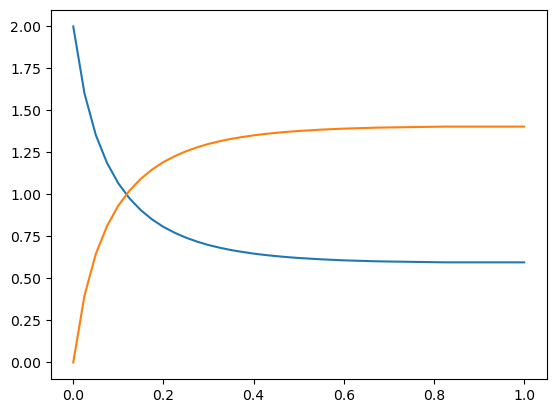

The equilibrium concentration for M is: 0.596 nM and for D is: 1.404 nM when N = 2


In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import random as rand

kb = 2
ku = 1

def Euler(t, step, y0, func):
    y = y0
    z = y0 - y
    t0 = 0   
    h = step
    ygraph = [y]
    zgraph = [z]
    tgraph = [t0]

    while t0 < t:
        y = y + h*func(y,z)
        z = y0-y
        t0 = t0+h
        y = round(y,3)
        z = round(z,3)
        
        ygraph.append(y)
        zgraph.append(z)  
        tgraph.append(t0)

    return ygraph, zgraph, tgraph
        
def Mdiff(y,z):
    return -2*kb*y**2 + ku*z

M,D,t = Euler(1,0.025,2,Mdiff)

fig, ax = plt.subplots()
ax.plot(t,M)
ax.plot(t,D)
plt.show()
print("The equilibrium concentration for M is: " + str(M[-1])+ " nM and for D is: "+str(D[-1]) +' nM when N = 2')



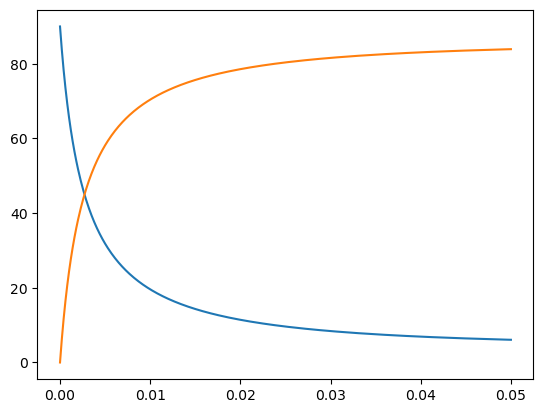

The equilibrium concentration for M is: 6.08 nM and for D is: 83.92 nM when N = 90


In [2]:
#now for N = 90

M,D,t = Euler(0.05,0.0001,90,Mdiff)

fig, ax = plt.subplots()
ax.plot(t,M)
ax.plot(t,D)
plt.show()
print("The equilibrium concentration for M is: " + str(M[-1])+ " nM and for D is: "+str(D[-1]) +' nM when N = 90')

The difference between the calculated equlibrium concentrations using the rate constants, and the numerically calculated equilbrium concentrations is quite large. At low concentrations of molecules, continuous equilibrium models tend to break down as the rates of reactions are much more dependent on the random motions of the molecules and the likelihood of them colliding and reacting compared to reactions involving huge numbers of molecules. 

### Part B: Stochastic Dimerization 
Continuum equations will work well for situations involving large number of molecules, however in cells, there is often only a few copies of DNA, mRNA, or sometimes proteins leading to large fluctuations in the rate of the reaction. These fluctuations are referred to as the *shot noise*. Suppose the reactions have rates $\Gamma_{i}$ with the total rate being $\Gamma_{tot} = \sum_{i}\Gamma_{i}$ The expected time to the next reaction is $\frac{1}{\Gamma_{tot}}$, and the probability that the next reaction will be $j$ is $\frac{\Gamma_{j}}{\Gamma_{tot}}$. To simulate until a final time $f$:
1. Calculate a list of rates of all the reactions in the system
2. Find the total rate $\Gamma_{tot}$
3. Pick a random time $t_{wait}$ with probability distribution $\rho(t) = \Gamma_{tot}e^{-\Gamma_{tot}t}$
4. If the current time $t$ plus $t_{wait}$ is greater than $t_{f}$, we are finished
5. Otherwise:
    + Increment $t$ by $t_{wait}$
    + Pick a random number $r$ uniformly distributed in range $[0,\Gamma_{tot})$
    + Pick the reaction $j$ for which $\sum_{i<j}\Gamma_{i} \le r < \sum_{i<j+1}\Gamma_{i}$ (r lands in the $j$th interval of the sum forming $\Gamma_{tot}$)
    + Execute that reaction by incrementing each chemical by its stoichemotry 
6. Repeat<br><br>
The binding rate for for $M$ total monomers is no longer $k_{b}M^{2}$ for discrete molecules, now it is $k_{b}M(M-1)$.

#### Implement this algorithm for the dimerization reaction. 
Simulte for $N=2,N=90,$ and $N=10,100$, and compared a few stochastic realizations with some of the continuous ones. How large of an N do you need for the individual reactions to be well modelled by the continuum equations (less that 20% fluctuations at late times)
<br><br>
The dimerization reaction:
$$2M \longleftrightarrow D$$ with rates $k_{b} = 1nM^{-1}s^{-1}$ and $k_{u} = 2\ s^{-1}$ has two associated rates represented by differential equations with it: $\frac{d[M]}{dt}$ and $\frac{d[D]}{dt}$.<br> M loses two molecules with a rate constant $k_{b}$ in the forward reaction, but then gains two more (from one dimer) in the reverse reaction with rate constant $k_{u}$, giving the reaction rate: $$\frac{d[M]}{dt} = 2k_{b}M^{2} + 2k_{u}D$$
Similarly, for D we have: $$\frac{d[D]}{dt} = k_{u}D+k_{b}M^{2}$$ 
<br> For the total reaction $\Gamma$, we have: $$\Gamma = k_{b}M^{2}+k_{u}D$$

The equilbrium concentration for M is approximately: 4 nM, and for D is it approximately: 8 nM


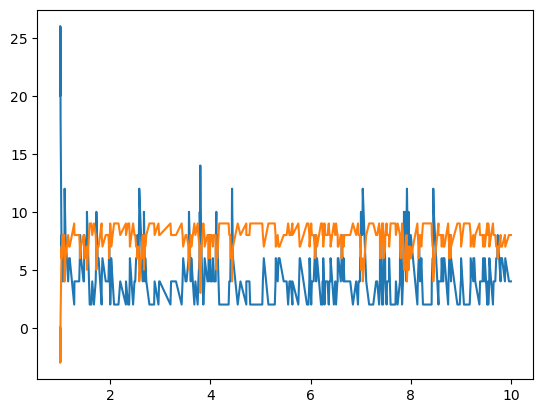

In [3]:
def TotalRate(M,D):
    return 2*kb*M**2 + 2*ku*D +ku*D+kb*M**2

def timeWait(M,D,t):
    t_wait = random.exponential(TotalRate(M,D)**-1)
    t += t_wait
    return t

def ProbFoward(M,D):
    prob = (2*kb*M**2)/TotalRate(M,D)
    return prob

def ProbReverse(M,D):
    prob = 1 - ProbFoward(M,D)
    return prob

def Sim(M,D, init_t, sim_time):
    totalM = []
    totalD = []
    totalt = []
    
    N = M+D
    t = init_t
    
    while t < sim_time:
        reaction = rand.choices(['F','R'],weights=[ProbFoward(M,D),ProbReverse(M,D)])
        t = timeWait(M,D,t)
        if reaction == ['F']:
            D += 1
            M -= 2
        elif reaction == ['R']:
            M += 2
            D -= 1
            totalM.append(M)
            totalD.append(D)
            totalt.append(t)
    return totalM, totalD, totalt

#Starting with N 20
M,D,t = Sim(20,0,1,10)

fig, ax = plt.subplots()
ax.plot(t,M)
ax.plot(t,D)

print("The equilbrium concentration for M is approximately: " + str(M[-1])+ " nM, and for D is it approximately: "+str(D[-1])+ " nM")
    

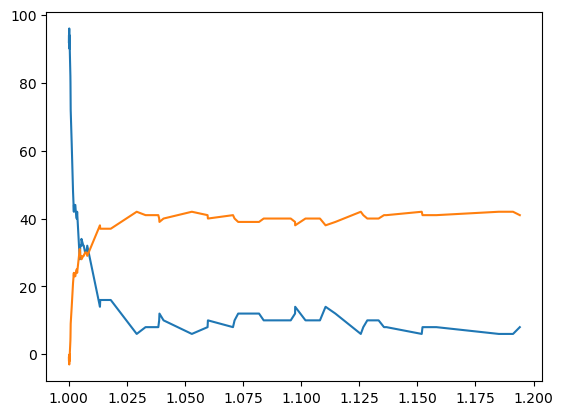

The equilbrium concentration for M is approximately: 8 nM, and for D is it approximately: 41 nM


In [4]:
#for N = 90
M,D,t = Sim(90,0,1,1.2)
fig, ax = plt.subplots()
ax.plot(t,M)
ax.plot(t,D)
plt.show()
print("The equilbrium concentration for M is approximately: " + str(M[-1])+ " nM, and for D is it approximately: "+str(D[-1])+ " nM")

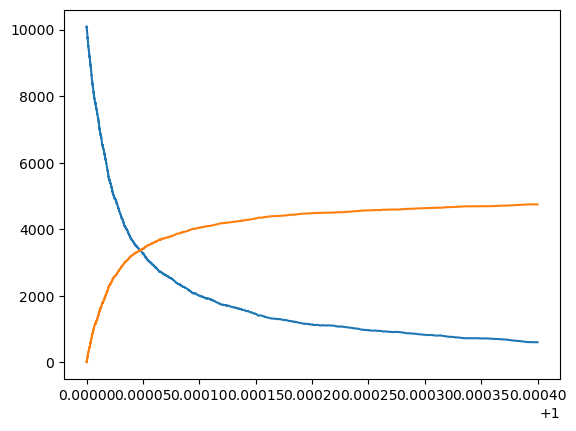

The equilbrium concentration for M is approximately: 606 nM, and for D is it approximately: 4747 nM


In [5]:
#for N = 10,100
M,D,t = Sim(10100,0,1,1.0004)
fig, ax = plt.subplots()
ax.plot(t,M)
ax.plot(t,D)
plt.show()
print("The equilbrium concentration for M is approximately: " + str(M[-1])+ " nM, and for D is it approximately: "+str(D[-1])+ " nM")

### Part C: Average Stochastic Dimerizations 
Real life biological experiments often take place over many cells as measuring the concentrations of compounds in a single cell is challenging. These experiements will show a smooth evolution through time despite the shot noise discussed earlier. Let's see if the ensemble average is well described by the continuum equations 
#### Find the average of many realizations of the stochastic dimerization
Do this for $N=2$ and $N=90$ and compare with the deterministic solution. How much is the long term average shifted by stochastic noise? How large of an $N$ do you need for $M(t)$ to be well described by the continuum equations (less than 5% fluctuation)

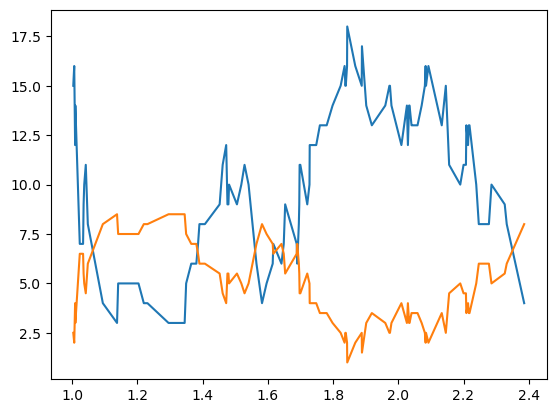

The equilbrium concentration for M is approximately: 4.0 nM, and for D is it approximately: 8.0 nM


In [6]:
def ensemble(N,init_M,init_D,init_t,sim_time):

    avgM = []
    avgD = []
    avgt = []
    n = 0
    while n<N:

        M,D,t = Sim(init_M,init_D,init_t,sim_time)
        avgM.append(M)
        avgD.append(D)
        avgt.append(t)
        n += 1
    
    arrayM = [np.array(i) for i in avgM]
    arrayD = [np.array(i) for i in avgD]
    arrayt = [np.array(i) for i in avgt]
    
    avgM = [np.mean(k) for k in zip(*arrayM)]
    avgD = [np.mean(k) for k in zip(*arrayD)]
    avgt = [np.mean(k) for k in zip(*arrayt)]
        
    return avgM, avgD, avgt

M,D,t = ensemble(2,20,0,1,3)

fig,ax = plt.subplots()
ax.plot(t,M)
ax.plot(t,D)
plt.show()
print("The equilbrium concentration for M is approximately: " + str(M[-1])+ " nM, and for D is it approximately: "+str(D[-1])+ " nM")

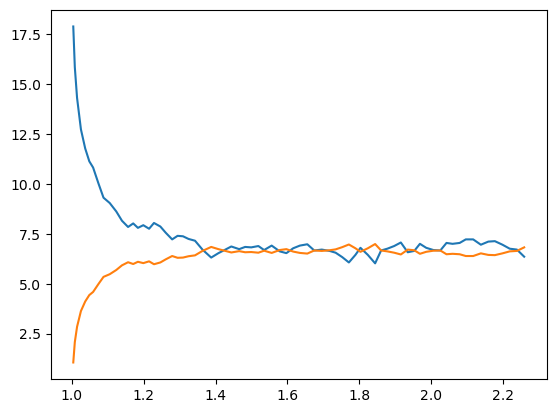

The equilbrium concentration for M is approximately: 6.355555555555555 nM, and for D is it approximately: 6.822222222222222 nM


In [7]:
# now for N = 90
M,D,t = ensemble(90,20,0,1,3)

fig,ax = plt.subplots()
ax.plot(t,M)
ax.plot(t,D)
plt.show()
print("The equilbrium concentration for M is approximately: " + str(M[-1])+ " nM, and for D is it approximately: "+str(D[-1])+ " nM")

The higher number of repeats or the dimerization petrinet, the more smooth the final dimerization reaction curve becomes. 

## The Repressilator - Probelm 8.11
A Repressilator is a type of genetic regulatory network involving at least three genes where the next gene product in the loop represses the previous gene. The first synthetic repressilator was engineerined in order to better understand genetic regulatory networks (Elowitz and Leibler, 2000). This synthetic repressilator uses three transcriptional repressors: LacI, TetR, and $\lambda$ CI. 
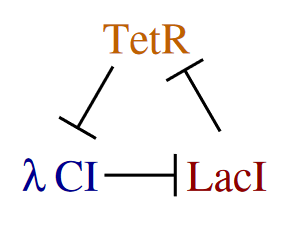
Here, TetR represses $\lambda$ CI, $\lambda$ CI represses TetR, and TetR represses LacI. As shown in the paper, and will be shown here later, the feedback loop of these three genes leads to a system where the concentrations of these three genes continuously oscillates, but overall expression stays stable. If we were to devise a petri net of these system, we also need to take in to account the other compounds involved in transription and translation, along with their reactions:
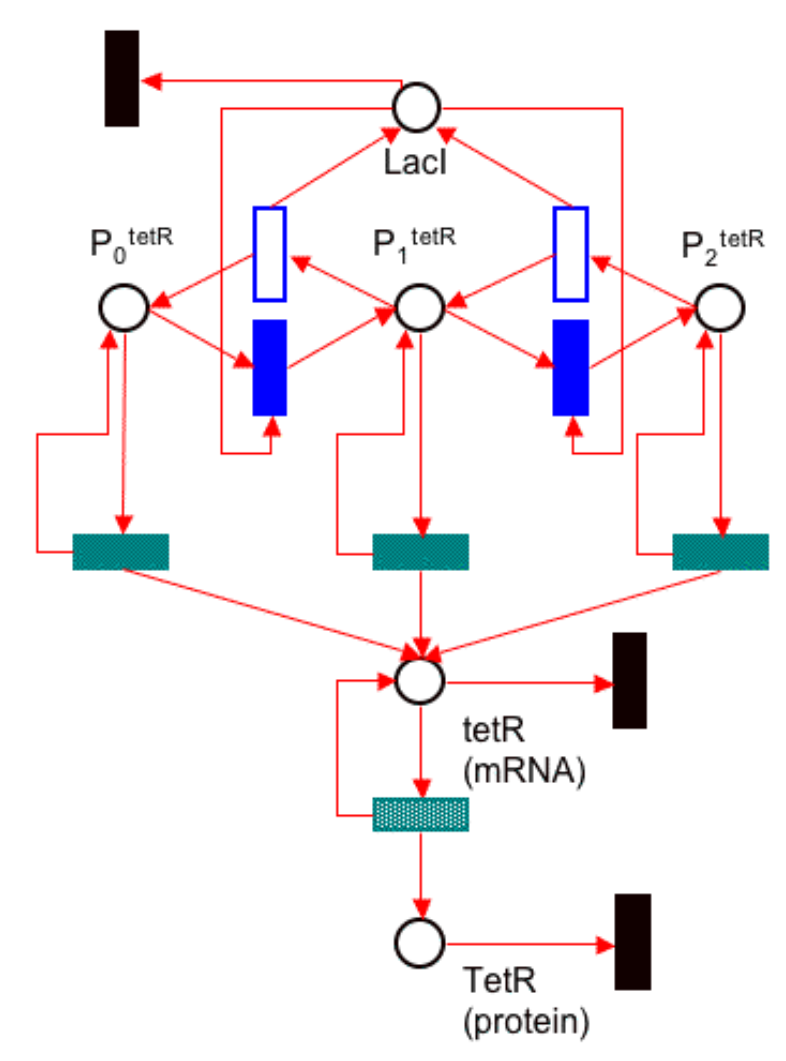
Here is the petri net for only the repression of TetR by LacI. Here we have:
* The solid vertical rectangles are binding reactions: $A + B \rightarrow C$ with rate $k_{b}[A][B]$ 
* The opened verticle rectangles represent unbinding: $C \rightarrow A + B$ with rate $k_{u}[C]$
* Horizontal rectangles represent catalyzied synthesis reactions $C \rightarrow C + P$ with rate $\gamma [C]$ 
    * darker rectangles are transcription 
    * lighter one is translation into the final protein
* Black vertical rectangles are degredation events: $A \rightarrow$ with rate $k_{d}[A]$ <br> <br>

Starting at the top, we have the LacI protein which can bind to the DNA in two promoter sites ahead of the coding region. When it binds, it blocks the transcription of TetR. $P_{0}$ represents no LacI bound, $P_{1}$ has one promoter site blocked, and $P_{2}$ has both sites blocked. LacI can either bind to another site, changing $P_{i}$ to $P_{i+1}$, or unbind, in which case the transcription of the TetR mRNA occurs qucikly. Transcription of TetR still occurs when LacI is bound, however at a much slower rate. The TetR mRNA then catalyzes the formation of the TetR protein. The full repressilator would have two more copies of this, with their respective gene products and transcriptional repressors, and would be connected by one gene product repressing the next gene in the feed backloop. Additionally, this is still yet a simplied model, leaving out other transcription factors, the multiple subunits of RNA polymerase and the ribosome, and cofactors for mRNA and peptide synthesis, and then also the things which control their synthesis. Because of the seemingly endless complexity, figuring out what is involved in a genetic regulatory network is somewhat easy, but elucidating the dynamics of these systems is incredibly difficult, hence the need for model such as the repressilator. <br><br>
The authors of the original repressilator system conviently lay out both a continuous deterministic approximation, along with a stochastic model that we can use. 
### Model the Continuous Repressilator 

The continuous model equations are given by:
$$\frac{dM_{i}}{dt} = -M_{i}+\frac{\alpha}{(1+p_{j}^{n})}+\alpha_{0}$$
and 
$$\frac{dp_{i}}{dt} = -\beta(p_{i}-M_{i})$$
where $i = lacI,\ tetR,\lambda Cl$, $j=\lambda Cl,\ lacI,\ tetR$. 
* dM represents the change in mRNA concentration, dp represents change in protein concentrations
* $\alpha_{0}$ is the number of protein copies per cell produced from a given promoter type in the presence of saturating amounts of repressor, and $\alpha + \alpha_{0}$ in its absence. 
* $\beta$ is the ratio of protein decay rate to mRNA decay rate. 
* $n$ is a Hill coeffecient. 
* Time is scaled to units of mRNA lifetime. 
* Protein concentrations are in units of $K_{m}$ (the number of repressors needed to half maximally repress a promoter). 
* mRNA concentrations are rescalled by translation effeciency (the average number of proteins produces per mRNA molecule)
<br><br>

The parameters used in the paper by Elowitz and Leibler are:
* Promoter strength: $5*10^{-4}$ (repressed) to $0.5$ (fully induced) transcripts per s
* Average translation effeciency: 20 proteins per transcript
* Hill coeffecient: 2
* Protein Half life: 10 minutes
* mRNA half life: 2 minutes
* $K_{m}$: 40 monomers per cell
* Assume one protein is 1 nM



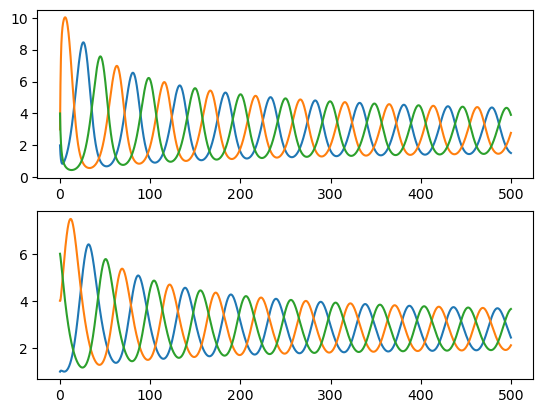

In [119]:
#initialize mRNA and protein concs
lacI_mRNA, tetR_mRNA, Cl_mRNA = 2,3,4
lacI_protein, tetR_protein, Cl_protein = 1,4,6

repressors = np.array([['lacI', 'tetR', 'Cl'],
                     [lacI_mRNA, tetR_mRNA, Cl_mRNA],
                     [lacI_protein, tetR_protein, Cl_protein]])

mRNA_out = [[],[],[]]
protein_out = [[],[],[]]
k,l = 0,0
for i in repressors[1,:]:
    mRNA_out[k].append(int(i))
    k += 1
    
for j in repressors[2,:]:
    protein_out[l].append(int(j))
    l+=1

"======================================================"

def dmRNA(mRNA0, repressor, alpha, alpha0, hill):
    dmdt = -mRNA0 + (alpha)/(1+repressor**hill)+alpha0
    return dmdt
    
def dProtein(protein, mRNA, beta):
    dpdt = -beta*(protein - mRNA)
    return dpdt

def euler_approx(sim_time, step, dmRNA, dProtein, alpha=20, alpha0=0.1, hill=2, beta=0.1):
    t = 0
    time_out = [0]
    while t < sim_time:
        #calculate mRNA
        indexi, indexj = 0,0
        for i in repressors[1,:]:
            #establish which repressor protein is blocking transcription
            if indexi - 1 < 0:
                repress_index = 2
            else:
                repress_index  = indexi - 1

            i = int(i)
            i = mRNA_out[indexi][-1] + step*(dmRNA(mRNA_out[indexi][-1], protein_out[repress_index][-1], alpha, alpha0, hill))
            
            mRNA_out[indexi].append(i)
            indexi += 1

        #calculate protein
        for j in repressors[2,:]:
            j = int(j)
            j = protein_out[indexj][-1] + step*(dProtein(protein_out[indexj][-1], mRNA_out[indexj][-1], beta))
            protein_out[indexj].append(j)
            indexj += 1
  
        t += step
        time_out.append(t)
    return mRNA_out, protein_out, time_out

sim_time = 500
step = 0.1

mRNA, protein, time = euler_approx(sim_time, step, dmRNA, dProtein)


fig, ax = plt.subplots(2)

ax[0].plot(time, mRNA[0], label='1')
ax[0].plot(time, mRNA[1], label = '1')
ax[0].plot(time, mRNA[2], label = '')

ax[1].plot(time, protein[0])
ax[1].plot(time, protein[1])
ax[1].plot(time, protein[2])

plt.show()
    

